In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import datetime as dt
from scipy import stats
from sklearn import preprocessing
import matplotlib as mpl
from scipy.stats import skew

## Plotting parameters
mpl.rcParams['pdf.fonttype'] = 42

## Cubic feet to cubic meters conversion factor
cfs_2_cms = 0.0283168466

In [2]:
pnwNP = pd.read_csv("../data/pnwNP_StatsLocations_SS.csv")
pnwNP[pnwNP["gage"]==10403000]

,Unnamed: 0,gage,dec_lat,dec_long,numZero,numOne,startDate,endDate,comid,numObs,propZero,propOne,minProb_SS,maxProb_SS,meanProb_SS,countProb_SS,medianProb_SS
11,11,10403000,43.691534,-119.659406,10,408,1951-10-02,1980-10-03,24017863.0,10594,0.000944,0.038512,0.563077,0.563077,0.563077,6,0.563077


In [3]:
i = 11
pnwNP = pd.read_csv("../data/pnwNP_StatsLocations_SS.csv")
df = pd.read_csv('../data/pnwNP_modeledData/'+str(pnwNP['gage'][i])+".csv")
df['time'] = pd.to_datetime(df['time'])
df['water_year'] = df.time.dt.year.where(df.time.dt.month < 4, df.time.dt.year + 1)
df

,Unnamed: 0,streamflow_VIC,time,streamflow_PRMS,streamflow_NWM2d0,streamflow_NWM2d1,streamflow_NWIS,gage,water_year
0,0,0.699362,1950-01-01,13.237974,NaN,NaN,NaN,10403000,1950
1,1,1.137636,1950-01-02,19.273840,NaN,NaN,NaN,10403000,1950
2,2,1.231265,1950-01-03,17.922047,NaN,NaN,NaN,10403000,1950
3,3,1.242612,1950-01-04,15.455377,NaN,NaN,NaN,10403000,1950
4,4,1.239824,1950-01-05,13.294694,NaN,NaN,NaN,10403000,1950
...,...,...,...,...,...,...,...,...,...
25928,25928,NaN,2020-12-27,NaN,NaN,0.12,NaN,10403000,2021
25929,25929,NaN,2020-12-28,NaN,NaN,0.12,NaN,10403000,2021
25930,25930,NaN,2020-12-29,NaN,NaN,0.12,NaN,10403000,2021
25931,25931,NaN,2020-12-30,NaN,NaN,0.12,NaN,10403000,2021


In [5]:
pnwNPss = pd.read_csv("../data/StreamStats_GageStats/"+str(pnwNP['gage'][i])+".csv")
pnwNPss['value'] = pnwNPss['value'] * cfs_2_cms
pnwNPss.head()
# pnwNPss

,value,statName,statCode,statDesc,statisticErrors,yearsofRecord,comments
0,0.041343,7 Day 2 Year Low Flow,M7D2Y,7-Day mean low-flow that occurs on average onc...,[],29.0,NaN
1,0.017217,7 Day 10 Year Low Flow,M7D10Y,7-Day mean low-flow that occurs on average onc...,[],29.0,NaN
2,13.733671,1 Percent Duration,D1,Streamflow exceeded 1 percent of the time,[],29.0,Statistic Date Range 10/1/1951 - 9/30/1980
3,10.562184,2 Percent Duration,D2,Streamflow exceeded 2 percent of the time,[],29.0,Statistic Date Range 10/1/1951 - 9/30/1980
4,8.778222,3 Percent Duration,D3,Streamflow exceeded 3 percent of the time,[],29.0,Statistic Date Range 10/1/1951 - 9/30/1980


In [23]:
df['7Q10'] = df['streamflow_NWIS'].rolling(window=7).mean()
df

,Unnamed: 0,streamflow_VIC,time,streamflow_PRMS,streamflow_NWM2d0,streamflow_NWM2d1,streamflow_NWIS,gage,water_year,7Q10
0,0,0.699362,1950-01-01,13.237974,NaN,NaN,NaN,10403000,1950,NaN
1,1,1.137636,1950-01-02,19.273840,NaN,NaN,NaN,10403000,1950,NaN
2,2,1.231265,1950-01-03,17.922047,NaN,NaN,NaN,10403000,1950,NaN
3,3,1.242612,1950-01-04,15.455377,NaN,NaN,NaN,10403000,1950,NaN
4,4,1.239824,1950-01-05,13.294694,NaN,NaN,NaN,10403000,1950,NaN
...,...,...,...,...,...,...,...,...,...,...
25928,25928,NaN,2020-12-27,NaN,NaN,0.12,NaN,10403000,2021,NaN
25929,25929,NaN,2020-12-28,NaN,NaN,0.12,NaN,10403000,2021,NaN
25930,25930,NaN,2020-12-29,NaN,NaN,0.12,NaN,10403000,2021,NaN
25931,25931,NaN,2020-12-30,NaN,NaN,0.12,NaN,10403000,2021,NaN


In [24]:
lf7q10 = df[['water_year','7Q10']]
lf7q10 = lf7q10.groupby(['water_year']).min()
lf7q10 = lf7q10[df['7Q10'].isnull().groupby(df['water_year']).sum() <= 36.6] ## makes sure that gage has at least 90% of year with data
lf7q10

,7Q10
water_year,
1953,0.076860
1954,0.113267
1955,0.041666
1956,0.016586
1957,0.080096
1958,0.051779
1959,0.081714
1960,0.005663
1961,0.026294


In [25]:
lf7q10["RI"] = (1+len(lf7q10))/lf7q10['7Q10'].rank(method = "min")
lf7q10["ExcProb"] = 1/lf7q10["RI"]

In [26]:
lf7q10

,7Q10,RI,ExcProb
water_year,,,
1953,0.076860,1.160000,0.862069
1954,0.113267,1.035714,0.965517
1955,0.041666,1.812500,0.551724
1956,0.016586,5.800000,0.172414
1957,0.080096,1.115385,0.896552
1958,0.051779,1.450000,0.689655
1959,0.081714,1.074074,0.931034
1960,0.005663,9.666667,0.103448
1961,0.026294,3.222222,0.310345


In [27]:
#Measures of the distribution
Xbar = np.mean(np.log10(lf7q10['7Q10']))
S = np.std(np.log10(lf7q10['7Q10']))
g = skew(np.log10(lf7q10['7Q10']))

lf7q10["z"] = 4.91 * ((1 / lf7q10["RI"])**0.14 -(1 - 1 / lf7q10["RI"])**0.14)
lf7q10["K"] = (2/g) * ((((lf7q10["z"] - (g/6))*(g/6)+1)**3)-1)
# lf7q10["K"] = (2/g) * (((1 + (g/lf7q10["z"])/6-(g**2)/36)**3) - 1)
lf7q10["Qfit"] = 10**(Xbar + (lf7q10["K"] * S))

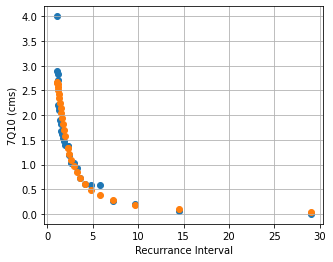

In [28]:
f,ax = plt.subplots(figsize=(5, 4))
plt.scatter(lf7q10["RI"],lf7q10['7Q10']/cfs_2_cms)
plt.scatter(lf7q10["RI"],lf7q10['Qfit']/cfs_2_cms)
ax.set_xlabel("Recurrance Interval")
ax.set_ylabel("7Q10 (cms)")
ax.grid()
# plt.show()
# plt.savefig("../docs/PlushCreek_7q10.png",dpi = 300)


In [30]:
RetIntCalc = 10
z = 4.91 * ((1 / RetIntCalc)**0.14 -(1 - 1 / RetIntCalc)**0.14)
K = (2/g) * ((((z - (g/6))*(g/6)+1)**3)-1)
nwis_ri_stored = (10**(Xbar + (K * S)))
nwis_ri_stored

0.004899941137118968